# Installing and importing necessary modules

In [1]:
pip install tf-models-official -q

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install livelossplot -q

Note: you may need to restart the kernel to use updated packages.


In [45]:
import tensorflow as tf
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences   
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense
from tensorflow.keras.models import Model
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay
import warnings
import matplotlib
import matplotlib.pyplot as plt
import tensorflow_models as tfm
matplotlib.use("module://matplotlib_inline.backend_inline")
import pandas as pd
import numpy as np
from tqdm import tqdm
from livelossplot import PlotLossesKeras
warnings.filterwarnings("ignore")

# Reading the dataset

In [4]:
data_train=pd.read_csv("/kaggle/input/malyalam-news-dataset/train.csv")
data_val=pd.read_csv("/kaggle/input/malyalam-news-dataset/valid.csv")

In [5]:
data_train.describe()

,headings,label
count,5036,5036
unique,4958,3
top,ഡോ. ബോബി ചെമ്മണൂരിന് അന്താരാഷ്ട്ര പവര്‍ ബോട്ട്...,entertainment
freq,2,1753


In [6]:
data_train.nunique()

headings    4958
label          3
dtype: int64

In [7]:
data_train=data_train.drop_duplicates()
data_train.reset_index(drop=True,inplace=True)
data_train

,headings,label
0,കൊച്ചി ചെരുപ്പ് വിതരണ കേന്ദ്രത്തിലെ തീപിടിത്തം...,business
1,ഈ​​​സ്റ്റേ​​​ണ്‍ ക​​​റി പൗ​​​ഡ​​​റി​​​ന് പു​​​...,business
2,ശ്രീശാന്തിന്റെ ആജീവനാന്ത വിലക്ക് പിന്‍വലിച്ചു,sports
3,റയല്‍ മാഡ്രിഡിനെ ഞെട്ടിച്ച യുവതാരം ബ്രസീല്‍ ടീ...,sports
4,"എനിക്ക് ശ്രീനിവാസന്‍ ആകേണ്ട, ലോഹിതദാസ് മതി : ക...",entertainment
...,...,...
4957,മുല്ലപ്പൂ വിപ്ലവത്തിലെ പുതിയ പോസ്റ്റര്‍ പുറത്ത...,entertainment
4958,ബാ​ങ്ക് അ​ക്കൗ​ണ്ടി​ന് ആ​ധാ​ര്‍ കാ​ര്‍​ഡ്: ഹൈ​...,business
4959,തോല്‍വിയുടെ ക്ഷീണത്തില്‍ നിന്ന് ടീമിന് കരകയറണം...,sports
4960,"അഹങ്കാരിയും ജാഡക്കാരനുമൊന്നുമല്ല, മമ്മൂസ് വെറു...",entertainment


In [8]:
data_val.describe()

,headings,label
count,1260,1260
unique,1251,3
top,ദേശീയ പൊലീസ് അക്വാട്ടിക് ചാമ്ബ്യന്‍ഷിപ്പില്‍ ക...,sports
freq,2,446


In [9]:
data_val=data_val.drop_duplicates()
data_val.reset_index(drop=True,inplace=True)
data_val

,headings,label
0,അന്താരാഷ്ട്ര ഇന്റര്‍നെറ്റ് സേവനം താല്‍ക്കാലികമ...,business
1,"മഞ്ഞ് ചതിച്ചാശാനേ!!!!, ഹാന്നോവറിന്റെ പ്രതീക്ഷക...",sports
2,"12 സീസണ്‍ എട്ടു ചാമ്ബ്യന്മാര്‍, പ്രവചിക്കാന്‍ ...",sports
3,\nമുംബൈ സിറ്റിയോടു തോറ്റിട്ടും യോഗ്യത നേടി ഗോവ...,sports
4,മദ്യപിച്ചെത്തിയ നടന്മാര്‍ തമ്മില്‍ കയ്യാങ്കളി;...,entertainment
...,...,...
1247,സാക്ഷാല്‍ വിരാട് കോഹ്ലിയെ പോലും ഞെട്ടിച്ച്‌ ജസ...,sports
1248,ചാമ്ബ്യന്‍സ് ലീഗ്; ബയേണിനെ തകര്‍ത്ത് ലിവര്‍പൂള...,sports
1249,20 രൂപയുടെ നാണയമിറക്കാന്‍ കേന്ദ്ര ധനകാര്യ മന്ത...,business
1250,ഇന്ത്യന്‍ സമ്ബദ് വ്യവസ്ഥ 7.3 ശതമാനം വളര്‍ച്ച ന...,business


In [10]:
overall_df=pd.concat([data_train,data_val])

In [11]:
overall_df.reset_index(drop=True,inplace=True)

In [12]:
overall_df

,headings,label
0,കൊച്ചി ചെരുപ്പ് വിതരണ കേന്ദ്രത്തിലെ തീപിടിത്തം...,business
1,ഈ​​​സ്റ്റേ​​​ണ്‍ ക​​​റി പൗ​​​ഡ​​​റി​​​ന് പു​​​...,business
2,ശ്രീശാന്തിന്റെ ആജീവനാന്ത വിലക്ക് പിന്‍വലിച്ചു,sports
3,റയല്‍ മാഡ്രിഡിനെ ഞെട്ടിച്ച യുവതാരം ബ്രസീല്‍ ടീ...,sports
4,"എനിക്ക് ശ്രീനിവാസന്‍ ആകേണ്ട, ലോഹിതദാസ് മതി : ക...",entertainment
...,...,...
6209,സാക്ഷാല്‍ വിരാട് കോഹ്ലിയെ പോലും ഞെട്ടിച്ച്‌ ജസ...,sports
6210,ചാമ്ബ്യന്‍സ് ലീഗ്; ബയേണിനെ തകര്‍ത്ത് ലിവര്‍പൂള...,sports
6211,20 രൂപയുടെ നാണയമിറക്കാന്‍ കേന്ദ്ര ധനകാര്യ മന്ത...,business
6212,ഇന്ത്യന്‍ സമ്ബദ് വ്യവസ്ഥ 7.3 ശതമാനം വളര്‍ച്ച ന...,business


In [13]:
list_df=list(overall_df["headings"])

In [14]:
list_df[:5]

['കൊച്ചി ചെരുപ്പ് വിതരണ കേന്ദ്രത്തിലെ തീപിടിത്തം; അന്വേഷണം തുടങ്ങി, അട്ടിമറി സാധ്യതയും പരിശോധിക്കുന്നു',
 'ഈ\u200b\u200b\u200bസ്റ്റേ\u200b\u200b\u200bണ്\u200d ക\u200b\u200b\u200bറി പൗ\u200b\u200b\u200bഡ\u200b\u200b\u200bറി\u200b\u200b\u200bന് പു\u200b\u200b\u200bര\u200b\u200b\u200bസ്കാ\u200b\u200b\u200bരം; സം\u200b\u200b\u200bസ്ഥാ\u200b\u200b\u200bന മ\u200b\u200b\u200bലി\u200b\u200b\u200bനീ\u200b\u200b\u200bക\u200b\u200b\u200bര\u200b\u200b\u200bണ നി\u200b\u200b\u200bയ\u200b\u200b\u200bന്ത്ര\u200b\u200b\u200bണ ബോ\u200b\u200b\u200bര്\u200d\u200b\u200b\u200bഡി\u200b\u200b\u200bന്\u200dറെ അവാര്\u200dഡ് പ\u200b\u200b\u200bരി\u200b\u200b\u200bസ്ഥി\u200b\u200b\u200bതി സൗ\u200b\u200b\u200bഹൃ\u200b\u200b\u200bദ പ്ര\u200b\u200b\u200bവ\u200b\u200b\u200bര്\u200d\u200b\u200b\u200bത്ത\u200b\u200b\u200bന\u200b\u200b\u200bരീ\u200b\u200b\u200bതി\u200b\u200b\u200bകള്\u200d നടപ്പാക്കിയതിനുള്ള അംഗീകാരമായി',
 'ശ്രീശാന്തിന്റെ ആജീവനാന്ത വിലക്ക് പിന്\u200dവലിച്ചു',
 'റയല്\u200d മാഡ്രിഡിനെ ഞെട്ടിച്ച യുവതാരം ബ്

# Removing the unnecessary characters

In [15]:
remove_characters=['~',
 '\xa0',
 '\xad',
 '\u200b',
 '\u200c',
 '\u200d',
 '\u200e',
'\u2060',
 '\ueb9a',
 '\uf03d',
 '\uf06e',
 '\ufeff',
    "\n"]

In [16]:
new_list_df=[]
for sent in tqdm(list_df):
    for char in remove_characters:
        if char in sent:
            sent=sent.replace(char,"")
    new_list_df.append(sent)
    

100%|██████████| 6214/6214 [00:00<00:00, 257205.50it/s]


In [17]:
new_list_df[:5]

['കൊച്ചി ചെരുപ്പ് വിതരണ കേന്ദ്രത്തിലെ തീപിടിത്തം; അന്വേഷണം തുടങ്ങി, അട്ടിമറി സാധ്യതയും പരിശോധിക്കുന്നു',
 'ഈസ്റ്റേണ് കറി പൗഡറിന് പുരസ്കാരം; സംസ്ഥാന മലിനീകരണ നിയന്ത്രണ ബോര്ഡിന്റെ അവാര്ഡ് പരിസ്ഥിതി സൗഹൃദ പ്രവര്ത്തനരീതികള് നടപ്പാക്കിയതിനുള്ള അംഗീകാരമായി',
 'ശ്രീശാന്തിന്റെ ആജീവനാന്ത വിലക്ക് പിന്വലിച്ചു',
 'റയല് മാഡ്രിഡിനെ ഞെട്ടിച്ച യുവതാരം ബ്രസീല് ടീമില്',
 'എനിക്ക് ശ്രീനിവാസന് ആകേണ്ട, ലോഹിതദാസ് മതി : കാരണം തുറന്നു പറഞ്ഞു ശ്യാം പുഷ്കരന്']

# Tokenizing the sentences into sequences and padding the sequences

In [18]:
tokenizer=Tokenizer(
    num_words=20000,
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
    split=' ',
    char_level=True)

In [19]:
tokenizer.fit_on_texts(new_list_df)

In [20]:
len(tokenizer.word_index)

119

In [21]:
train_sequences = tokenizer.texts_to_sequences(data_train["headings"])
train_labels=list(data_train["label"])

val_sequences = tokenizer.texts_to_sequences(data_val["headings"])
val_labels=list(data_val["label"])

In [22]:
train_sequences    =   pad_sequences(train_sequences,  maxlen=128, padding='post') 
val_sequences   =   pad_sequences(val_sequences, maxlen=128, padding='post')

In [23]:
train_sequences=np.array(train_sequences)
val_sequences=np.array(val_sequences)

# Encoding the labels

In [24]:
le = LabelEncoder()

In [25]:
train_labels=np.array(le.fit_transform(train_labels))
val_labels=np.array(le.transform(val_labels))

In [26]:
np.shape(train_sequences)

(4962, 128)

# Building the models

In [27]:
def build_model():
    latent_dim = 100


    # Encoder 
    encoder_inputs = Input(shape=(128,)) 
    enc_emb = Embedding(128,latent_dim,trainable=True)(encoder_inputs)

    #LSTM 1 
    enc_tr=tfm.nlp.layers.TransformerEncoderBlock(num_attention_heads=100,inner_dim=128,inner_activation="relu")(enc_emb)
    #dec_tr=tfm.nlp.layers.TransformerDecoderBlock(num_attention_heads=500,intermediate_size=350,intermediate_activation="relu")(enc_emb)

    #Dense layer
    encoder_lstm1 = LSTM(32,return_sequences=False)(enc_tr)
    
    decoder_dense = Dense(3,activation = "softmax")(encoder_lstm1)

    # Define the model
    model = Model(inputs=encoder_inputs,outputs=decoder_dense) 
    
    return model

In [28]:
model=build_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128)]             0         
                                                                 
 embedding (Embedding)       (None, 128, 100)          12800     
                                                                 
 transformer_encoder_block   (None, 128, 100)          66628     
 (TransformerEncoderBlock)                                       
                                                                 
 lstm (LSTM)                 (None, 32)                17024     
                                                                 
 dense (Dense)               (None, 3)                 99        
                                                                 
Total params: 96551 (377.15 KB)
Trainable params: 96551 (377.15 KB)
Non-trainable params: 0 (0.00 Byte)
_______________________

In [29]:
model.compile(optimizer='adam',loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [30]:
es=tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    min_delta=0,
    patience=15,
    mode="max",)

In [31]:
mc=tf.keras.callbacks.ModelCheckpoint(
    "best_model.hdf5",
    monitor="val_loss",
    save_best_only=True)

In [32]:
lronp=tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.01,
    patience=10,)

# Training the model

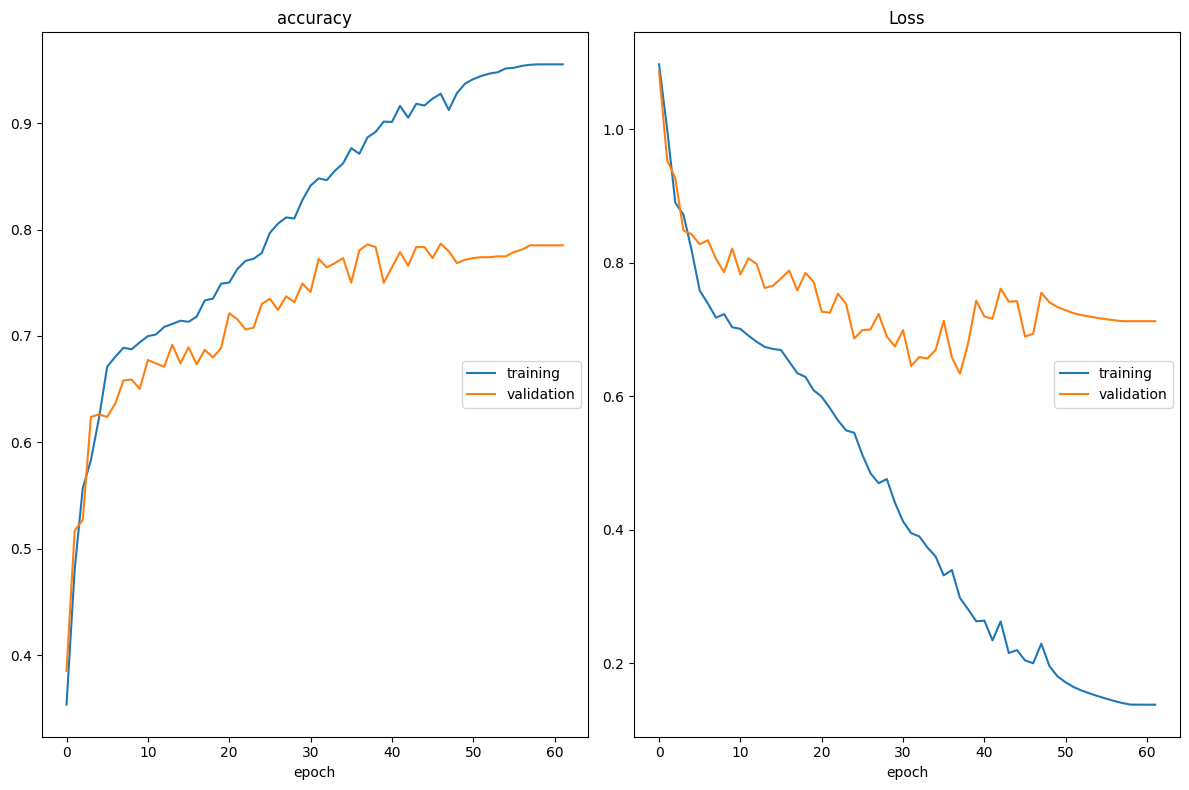

accuracy
	training         	 (min:    0.353, max:    0.955, cur:    0.955)
	validation       	 (min:    0.385, max:    0.787, cur:    0.785)
Loss
	training         	 (min:    0.138, max:    1.097, cur:    0.138)
	validation       	 (min:    0.634, max:    1.086, cur:    0.712)
156/156 [==============================] - 4s 24ms/step - loss: 0.1382 - accuracy: 0.9553 - val_loss: 0.7124 - val_accuracy: 0.7851 - lr: 1.0000e-07


In [33]:
model.fit(x=train_sequences,y=train_labels,validation_data=(val_sequences,val_labels),
         epochs=100,callbacks=[PlotLossesKeras(),es,mc,lronp])

# Evaluating the trained model

In [35]:
pr=model.predict(val_sequences)

40/40 [==============================] - 1s 8ms/step


In [38]:
p=[np.argmax(el) for el in pr]

In [44]:
print(classification_report(val_labels,p, target_names=["business","entertainment","sports"]))

               precision    recall  f1-score   support

     business       0.75      0.77      0.76       381
entertainment       0.81      0.80      0.81       429
       sports       0.79      0.78      0.78       442

     accuracy                           0.79      1252
    macro avg       0.78      0.78      0.78      1252
 weighted avg       0.79      0.79      0.79      1252



In [47]:
cm = confusion_matrix(val_labels, p)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=le.classes_)

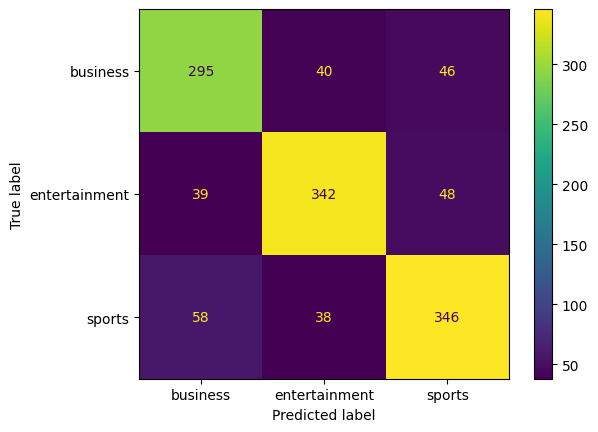

In [48]:
disp.plot()
plt.show()

# Inference

In [54]:
def infer_sentence(text):
    for char in remove_characters:
        if char in text:
            text=text.replace(char,"")
    seq=tokenizer.texts_to_sequences(text)
    pad_seq=pad_sequences(seq, maxlen=128, padding='post') 
    p=np.argmax(model.predict(pad_seq,verbose=0)[0])
    
    return le.classes_[p]
    
    


In [65]:
input_text="18 മാസം തുടർച്ചയായി കഠിന പരിശീലനം; ധ്രുവ് ജുറേലിന്റെ പ്രകടനത്തിനു പിന്നിലെ രഹസ്യം"
input_text2="ക്രെഡിറ്റ് കാര്‍ഡ് സാമ്പത്തിക ബാധ്യത ഒഴിവാക്കാൻ ഇക്കാര്യങ്ങളറിയാം"
print(input_text,infer_sentence(input_text))
print(input_text2,infer_sentence(input_text2))

18 മാസം തുടർച്ചയായി കഠിന പരിശീലനം; ധ്രുവ് ജുറേലിന്റെ പ്രകടനത്തിനു പിന്നിലെ രഹസ്യം sports
ക്രെഡിറ്റ് കാര്‍ഡ് സാമ്പത്തിക ബാധ്യത ഒഴിവാക്കാൻ ഇക്കാര്യങ്ങളറിയാം business
